In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import math

In [2]:
columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
dataset=pd.read_csv("housing.csv", names=columns , delim_whitespace=True)


In [3]:
dataset.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

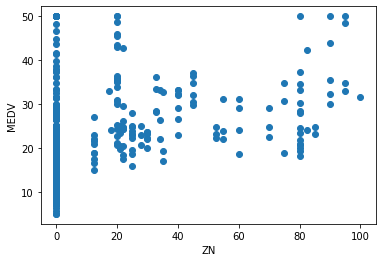

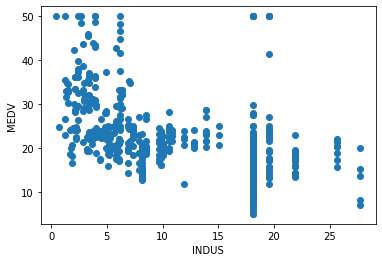

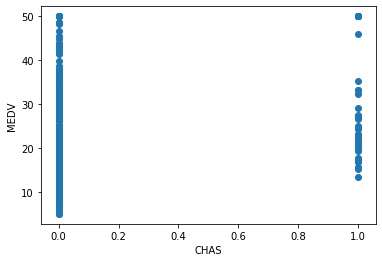

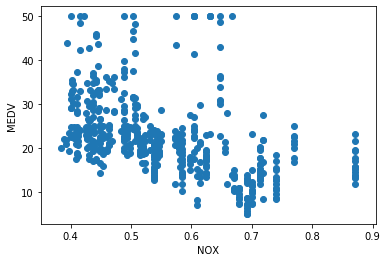

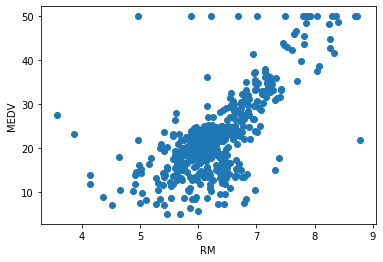

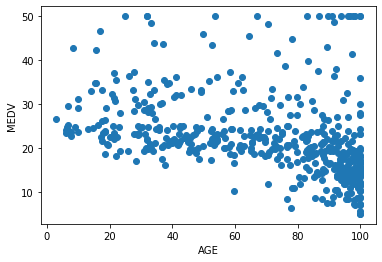

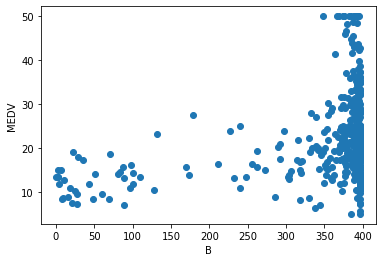

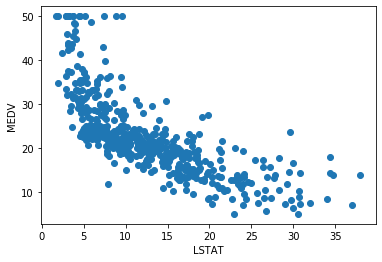

In [4]:
for i in columns[:-1]:
    plt.figure()
    plt.scatter(dataset[i], dataset["MEDV"])
    plt.xlabel(i)
    plt.ylabel("MEDV")
    plt.show()

# Preprocessing

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
scaler = preprocessing.StandardScaler().fit(dataset)
dataset_scaled = pd.DataFrame(scaler.transform(dataset),columns=columns)
#dataset_scaled
train_data=dataset_scaled.drop("MEDV", axis=1)
test_data=dataset_scaled["MEDV"]
dataset_scaled.head()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503

[Text(0.5, 1, 'Correlation Matrix')]

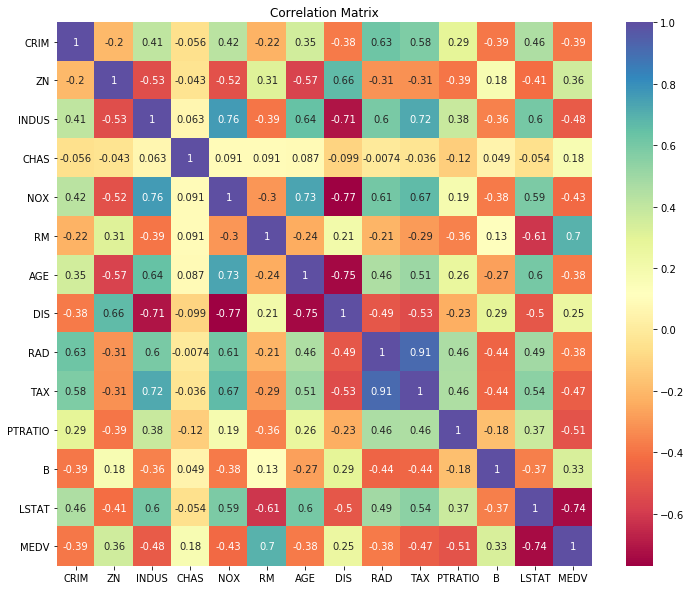

In [7]:
# Correlation matrix
corr = dataset_scaled.corr() 
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components="mle", whiten=True,svd_solver ="full").fit(train_data)
new_set=pca.transform(train_data)
print("New Dimension of Train_data after PCA: ", len(new_set[0]))


New Dimension of Train_data after PCA:  12


# Linear Regression - Train the model

In [61]:
def LinearRegressionModel(lambdaa):
    bins = np.linspace(0, len(dataset_scaled), int(math.ceil(len(dataset_scaled)/50)))

    y_binned = np.digitize(test_data, bins)

    X_train_cross, X_test, y_train_cross, y_test = train_test_split(new_set,test_data,
                                                        test_size=0.2, stratify=y_binned)

    
    err_polynomials=[]
    err_trainn=[]
    for i in range(1,7):
        poly = PolynomialFeatures(degree=i, include_bias=True)
        err=0
        err_train=0
        trials=20

        for z in range(trials):
            bins = np.linspace(0, len(X_train_cross), int(math.ceil(len(X_train_cross)/50)))
            y_binned = np.digitize(y_train_cross, bins)
            

            X_train, X_cross, y_train, y_cross = train_test_split(X_train_cross,y_train_cross,
                                                        test_size=0.16,stratify=y_binned)

            x_train_trans = poly.fit_transform(X_train)
            x_test_trans = poly.transform(X_cross)
            #include bias parameter
            lr = linear_model.Ridge(alpha=lambdaa).fit(x_train_trans, y_train)

            y_pred = lr.predict(x_test_trans)
            #print(r2_score(y_cross, y_pred))
            y_pred_train=lr.predict(x_train_trans)





    #reg = LinearRegression().fit(X_train, y_train)
    #y_pred_test = reg.predict(X_test)
            err+=mean_squared_error(y_cross, y_pred)
            err_train+=mean_squared_error(y_train, y_pred_train)
        err_polynomials.append(err/trials) 
        err_trainn.append(err_train/trials)
    return err_trainn,err_polynomials        

In [62]:
def plot(err_trainn,polynomials):
    
    plt.plot(range(1,7),err_polynomials,  "-b",label = 'Cross Validation Error')
    plt.plot(range(1,7),err_trainn,  "-r", label = 'Train error')
    plt.xlabel("Degree of Polynomial")
    plt.ylabel("Cost Function")
    plt.show()

# Test

In [63]:
def Test(best_lambda_degree):
    bins = np.linspace(0, len(dataset_scaled), int(math.ceil(len(dataset_scaled)/50)))
    y_binned = np.digitize(test_data, bins)
    X_train_cross, X_test, y_train_cross, y_test = train_test_split(new_set,test_data,
                                                        test_size=0.2, stratify=y_binned)
    
    bins = np.linspace(0, len(X_train_cross), int(math.ceil(len(X_train_cross)/50)))
    y_binned = np.digitize(y_train_cross, bins)

    X_train, X_cross, y_train, y_cross = train_test_split(X_train_cross,y_train_cross,
                                                        test_size=0.16,stratify=y_binned)
    
    
    
    poly = PolynomialFeatures(degree=best_lambda_degree[1], include_bias=True)
    x_train_trans = poly.fit_transform(X_train)
    x_test_trans = poly.transform(X_test)


    lr = linear_model.Ridge(alpha=best_lambda_degree[0])
    lr.fit(x_train_trans, y_train)
    y_pred = lr.predict(x_test_trans)
    err=mean_squared_error(y_test, y_pred)
    return err

# Regularization

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=9.16881e-19): result may not be accurate.
  overwrite_a=False)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular m

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=9.2652e-19): result may not be accurate.
  overwrite_a=False)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular ma

lambda= 0
Avg Cross Validation Error of each degree:  [0.30141528640233894, 0.230177052883958, 782.322952946677, 20.906486032848754, 40.86541927910635, 8279.276119377171] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.26850421234219285, 0.07071747660232171, 6.89333617167011e-17, 3.7276852961831324e-20, 1.7700650769485048e-17, 6.156101656279662e-14]


lambda= 0.01
Avg Cross Validation Error of each degree:  [0.3420122025399475, 0.1918932309617999, 92.1823756841242, 37.01475109842319, 308.71407873194966, 217.37124357335284] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.27625359217425116, 0.07200700614440407, 0.0010411954486668985, 2.0015470892238262e-07, 1.796162126775547e-08, 7.802213466194316e-09]


lambda= 0.02
Avg Cross Validation Error of each degree:  [0.28734795879918806, 0.18809182241427422, 55.815584891138464, 31.148460947653177, 40.02892304860693, 10944.443968495705] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.27748843067670925, 0.07025244808986329, 0.0016595878712774973, 1.196400778444668e-06, 9.387982944493949e-08, 3.421896019473113e-08]


lambda= 0.04
Avg Cross Validation Error of each degree:  [0.2942090708280637, 0.19606504465833116, 18.399974086578034, 8.057656757184258, 332.91980729093075, 13458.193068554567] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2537065375936643, 0.0702463521613348, 0.00243134814643596, 2.9242801825979625e-06, 1.9621980441959227e-07, 5.856054413567966e-08]


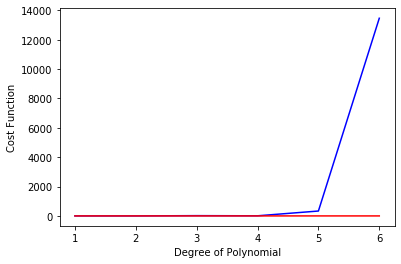

lambda= 0.08
Avg Cross Validation Error of each degree:  [0.2789009693778051, 0.20080684740129148, 8.068441859197435, 31.10688599356112, 43.57632422556003, 862.0807923837198] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2477213876170572, 0.07653371338171044, 0.003726056019395199, 2.232010567210111e-05, 1.470810862847707e-06, 4.2495330772365215e-07]


lambda= 0.16
Avg Cross Validation Error of each degree:  [0.3032420059892741, 0.2525996572953203, 20.132985142702886, 112.55081141566582, 45.943862969898404, 1893.141958769274] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2760343306136827, 0.0741155102083081, 0.004685580443887988, 4.352776245884159e-05, 3.2112207186935585e-06, 1.0617434051208836e-06]


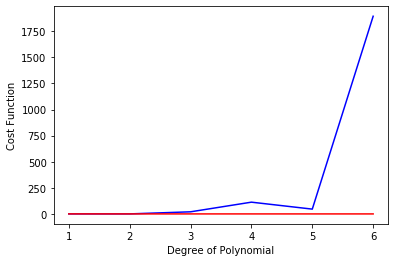

lambda= 0.32
Avg Cross Validation Error of each degree:  [0.27599393746315004, 0.23398940267807772, 4.262645104483926, 5.7236119797173135, 169.76520912761524, 349.41564839326946] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.26578256445233506, 0.05968904029160356, 0.004926968826399397, 0.00010119729257736781, 1.1190224491107132e-05, 3.6294005658509197e-06]


lambda= 0.64
Avg Cross Validation Error of each degree:  [0.3061621419993142, 0.17709035579806537, 1.6153340437088946, 10.83192342524995, 33.213445263950135, 1222.7413185835628] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2844866157277494, 0.07575978363802757, 0.008891221909412675, 0.00035107986361966094, 4.3552769074314737e-05, 1.1347305951246802e-05]


lambda= 1.28
Avg Cross Validation Error of each degree:  [0.28996226939593533, 0.15725243072631923, 3.6299908684683, 5.429020874269771, 24.292628417226606, 1487.4010106852534] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2621516039498073, 0.0718996339329349, 0.00895195618907822, 0.0007294376482903799, 0.00011154984503912746, 2.8204503674189456e-05]


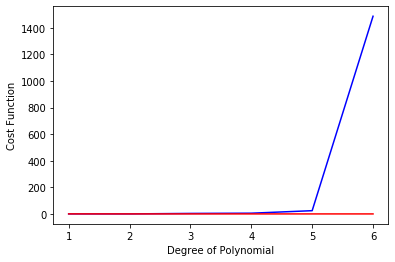

lambda= 2.56
Avg Cross Validation Error of each degree:  [0.3250579666932647, 0.2992680632289112, 6.340704340120211, 14.40636029164778, 316.19741853425427, 27469.663981996517] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.28586353829959227, 0.07455461954752818, 0.013401892859456982, 0.0013101032496271351, 0.0002764967034705961, 9.919680544980974e-05]


lambda= 3
Avg Cross Validation Error of each degree:  [0.33011556983145474, 0.16946844324481009, 6.498707368831324, 27.945266244553483, 238.96855103414265, 494.88281049528484] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2845624211997818, 0.07205373528088639, 0.012876966624522984, 0.001980519925719842, 0.00047855575766264007, 0.0001689893546066409]


lambda= 4
Avg Cross Validation Error of each degree:  [0.3070898107023852, 0.13962560969416546, 0.8233170400072467, 5.083900688746938, 6.962969114572711, 441.62886985114267] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2509303790508183, 0.06878751323442317, 0.014962607072714513, 0.0019491129820490625, 0.0005308398405418149, 0.00021208568709112882]


lambda= 5.12
Avg Cross Validation Error of each degree:  [0.2485609949531143, 0.23552399172883165, 1.0942765327858208, 3.6440650608104597, 170.52638059034092, 3553.361817502532] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.25199379252373455, 0.07084910467324197, 0.013839317974793621, 0.0024243795028016943, 0.000773597955658068, 0.00028325984529107857]


lambda= 6
Avg Cross Validation Error of each degree:  [0.3392686033871649, 0.19015237211904618, 4.228745944081821, 2.830906140934301, 41.57120073503207, 1309.7368485732743] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.25061235389787034, 0.07992254491932198, 0.01701253851562941, 0.0031710945881526023, 0.0009159666232071786, 0.00038065328013387606]


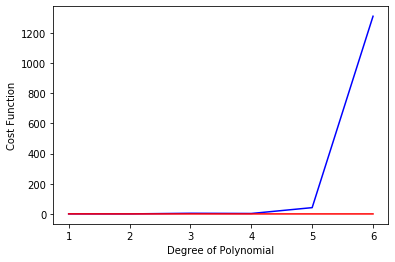

lambda= 7
Avg Cross Validation Error of each degree:  [0.34587697011032864, 0.16431388434149746, 0.37031539151936554, 19.538391847789377, 41.48548426898194, 977.5132767986546] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.24082497995328986, 0.058860201577633706, 0.014143007465900304, 0.0030889165312474164, 0.0008105187657570206, 0.00028030410026187784]


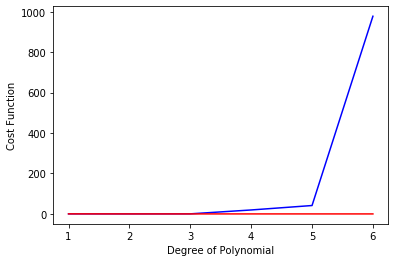

lambda= 8
Avg Cross Validation Error of each degree:  [0.3286186719676493, 0.17092138689087158, 1.262197129109142, 2.7740201479986553, 310.60814753229135, 1041.723953099131] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.25918356556305966, 0.06966734871763472, 0.01870471048403362, 0.0040099604941272226, 0.0013550445639674681, 0.0005666397797949059]


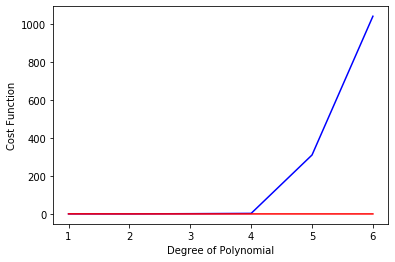

lambda= 10.24
Avg Cross Validation Error of each degree:  [0.3191564639473773, 0.19851579576827136, 0.5481647929841423, 5.389670756645007, 113.82713233103853, 538.5462627447785] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.29445180117864245, 0.08406849381114082, 0.021913649502758006, 0.004936543801352984, 0.0018407362075337631, 0.000786658096993189]


lambda= 15
Avg Cross Validation Error of each degree:  [0.2983517735801686, 0.16178890819164546, 0.37958588706642316, 1.2474237279958578, 7.4724383673837425, 518.2429251808718] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.25251839560681527, 0.08052183015627426, 0.023352795004870402, 0.00632913323232466, 0.002551949359886996, 0.0011842511853809847]


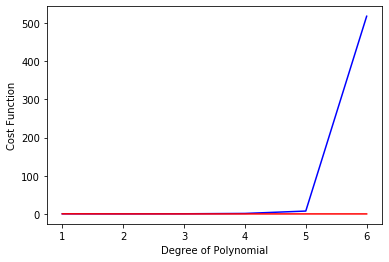

lambda= 16
Avg Cross Validation Error of each degree:  [0.31201322967138906, 0.1609501364996623, 0.9177567355514891, 1.305596539163779, 1.5782064055664162, 33.6240380313023] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.26355376217473814, 0.08136914532319531, 0.02569237052957818, 0.007045730012519599, 0.0024477630945870335, 0.0011659887643626723]


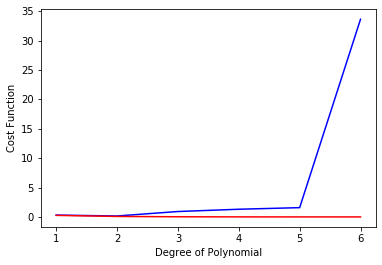

lambda= 17
Avg Cross Validation Error of each degree:  [0.26734200810736064, 0.19356633390217004, 0.6455552933789175, 3.569218396660535, 15.503164116072323, 1145.4706564201329] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.25900360388994914, 0.08108580098604215, 0.02499887474074299, 0.00598309434096313, 0.0022285623616845043, 0.001071323943086335]


lambda= 18
Avg Cross Validation Error of each degree:  [0.3200428522590749, 0.17889796120364093, 0.7011712948487745, 0.8517252530720203, 285.2058430233331, 2421.8711274734655] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.27789545539455485, 0.08705706459807072, 0.027913203258619505, 0.007178852069754627, 0.002564849700450848, 0.001265649103513806]


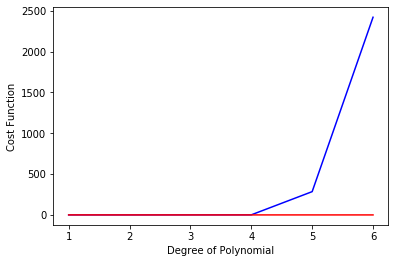

lambda= 19
Avg Cross Validation Error of each degree:  [0.2860195701664587, 0.1704822241389145, 0.45173704439248574, 4.79484779269287, 26.110445432430442, 1830.5652541094194] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.28000261523939857, 0.0767337352452168, 0.02385831446836837, 0.006943181753885341, 0.0026217566122215723, 0.0013170253409963094]


lambda= 20
Avg Cross Validation Error of each degree:  [0.2991791094926732, 0.15085418290915284, 0.3341573319678762, 2.1080489559727713, 9.492833757645645, 269.3284200396994] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2644227737647328, 0.07585765390626768, 0.022385562014265434, 0.007282517633526699, 0.002630406587532135, 0.0012079908380214486]


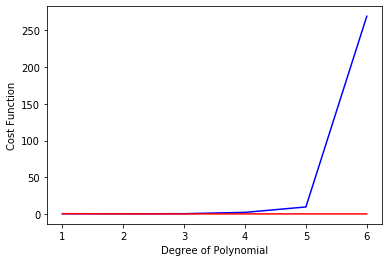

[4, 2]

In [64]:
from sklearn import linear_model
lambdaRanges=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,3,4,5.12,6,7,8,10.24,15,16,17,18,19,20]
best_error=math.inf
best_lambda_degree=[]
training_Cross_Error=[]
for i in lambdaRanges:
    err_trainn,err_polynomials = LinearRegressionModel(i)
    Best_polynomial_degree= err_polynomials.index(min(err_polynomials))+1
    print("lambda=", i)
    print("Avg Cross Validation Error of each degree: ", err_polynomials,"\n","Polynomial degree= ", Best_polynomial_degree)
    print("Avg Train Error of each degree: ",err_trainn)
    plot(err_trainn,err_polynomials)
    if min(err_polynomials) < best_error:
        best_error= min(err_polynomials)
        best_lambda_degree=[i,Best_polynomial_degree] 
    training_Cross_Error.append([min(err_trainn),min(err_polynomials)])    
best_lambda_degree        
    
    

In [75]:
test_error=Test(best_lambda_degree)
test_error

0.11720840870741045

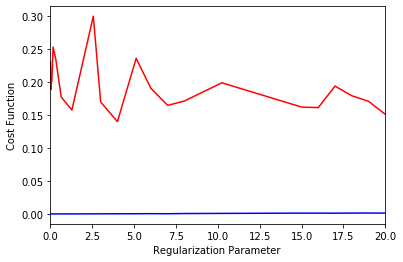

In [74]:
plt.figure()
plt.plot(lambdaRanges,np.array(training_Cross_Error)[:,0],"-b")
plt.plot(lambdaRanges,np.array(training_Cross_Error)[:,1],"-r")
plt.xlim([0,20])
plt.xlabel("Regularization Parameter ")
plt.ylabel("Cost Function")
plt.show()